## 1. Compute overgeneralisation matrix data

In [2]:
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import sys
sys.path.append("../wiktionary")
from categorise import categorise

#### Step 1: Load the data by categorising model predictions in all epochs.

In [4]:
def load_data(epoch, seed):
    """Load Wiktionary predictions from hard-coded path file.
    
    Args:
        epoch (int): number from 1 to 25
        seed (int): number from 1 to 5
    Returns:
        tgts is a list of strings that are the suffix classes
        prds is a list of strings that are predicted suffix classes
    """
    tgts, prds = [], []
    filename = f"../opennmt/models/seed={seed}_wiktionary/wiktionary/lstms2s_train_pred_{epoch}.txt"
    with open("../wiktionary/wiktionary_train.src", encoding="utf-8") as f_src, \
         open("../wiktionary/wiktionary_train.tgt", encoding="utf-8") as f_tgt, \
         open(filename, encoding="utf-8") as f_prd:
        for src, tgt, prd in zip(f_src, f_tgt, f_prd):
            category_tgt = categorise(src.strip(), tgt.strip())
            category_prd = categorise(src.strip(), prd.strip())
            tgts.append(category_tgt)
            prds.append(category_prd)
    return tgts, prds

overgeneralisation = defaultdict(lambda: defaultdict(lambda : defaultdict(list)))

epochs = range(1, 26)
for epoch in epochs:
    print(f"Processing epoch {epoch}")
    for seed in [1, 2, 3, 4, 5]:
        cats_tgts, cats_prds = load_data(epoch, seed)
        for focus_class in [0, 1, 2, 3, 4]:
            for overgen_class in [0, 1, 2, 3, 4]:
                overgeneralisation[focus_class][overgen_class][seed].append(
                    np.mean([y == overgen_class for x, y in zip(cats_tgts, cats_prds) if x == focus_class]))

Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25


#### Step 2: Per "focus" suffix class, we report how often all other classes were emitted, using the maximum amount over the course of training and the standard deviation.

In [ ]:
for focus_class in [0, 1, 2, 3, 4]:
    for overgen_class in [0, 1, 2, 3, 4]:
        maxi = []
        for seed in [1, 2, 3, 4, 5]:
            maxi.append(max(overgeneralisation[focus_class][overgen_class][seed]))
        print(focus_class, overgen_class, round(np.mean(maxi)*100, 2), round(np.std(maxi)*100, 2))

## 2. Visualise overgeneralisation curves for -s and -er

#### Step 1: Create functionality to process overgeneralisation numbers for one focus class.

In [8]:
sns.set_context("talk")

def process_overgeneralisation(focus_class):
    """
    Turn target and prediction classes into overgen % for 25 epochs.
    
    Args:
        tgts (list): plural classes of targets
        prds (list): plural classes of predictions
        focus_class (int): class for which you want to analyse overgen

    Returns:
        dict with per plural_class a list of overgen over training
    """
    accuracies = defaultdict(list)
    epochs = range(1, 26)
    for epoch in epochs:
        print(f"Processing epoch {epoch}")
        per_seed_acc = defaultdict(list)
        for seed in [1, 2, 3, 4, 5]:
            tgts, prds = load_data(epoch, seed)
            for plural_class in range(5):
                per_seed_acc[plural_class].append(
                    np.mean([y == plural_class for x, y in zip(tgts, prds) if x == focus_class]))
        for plural_class in range(5):
            accuracies[plural_class].append(np.mean(per_seed_acc[plural_class]))
    return accuracies

#### Step 2: Run overgeneralisation for -s.

In [ ]:
accuracies = process_overgeneralisation(4)

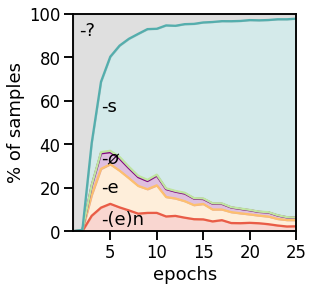

In [11]:
colours = sns.color_palette("Spectral", 5)
colours[2] = "purple"
epochs = list(range(1, 26))
figure = plt.figure(figsize=(4, 4))

def sum_lists(lists):
    lists = np.matrix(lists).sum(axis=0).squeeze(0).tolist()
    return lists[0]

for i in range(5):
    ax = sns.lineplot(x=epochs, y=sum_lists([accuracies[j] for j in range(i+1)]), color=colours[i])
    if i == 0:
        plt.fill_between(
            epochs, [0 for _ in epochs], accuracies[i], alpha=0.25, color=colours[i])
    elif i < 5:
        plt.fill_between(
            epochs, sum_lists([accuracies[j] for j in range(i)]),
            sum_lists([accuracies[j] for j in range(i+1)]), alpha=0.25, color=colours[i])

plt.fill_between(
    epochs, sum_lists([accuracies[j] for j in range(5)]),
    [1 for _ in epochs], alpha=0.25, color="grey")
        
plt.xlabel("epochs")
plt.ylabel("% of samples")
plt.ylim(0, 1)
plt.xlim(1, 25)
plt.text(1.7, 0.9, "-?")
plt.text(4, 0.55, "-s")
plt.text(4, 0.18, "-e")
plt.text(4, 0.31, "-$\o$")
plt.text(4, 0.03, "-(e)n")
ax.set_yticks([0, .20, .40, .60, .80, 1.00])
ax.set_yticklabels([0, 20, 40, 60, 80, 100])
ax.set_xticks([5, 10, 15, 20, 25])
plt.savefig("figures/overgeneralisation_wiktionary_s.pdf", bbox_inches="tight")

#### Step 3: Run overgeneralisation for -er.

In [12]:
accuracies = process_overgeneralisation(3)

Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25


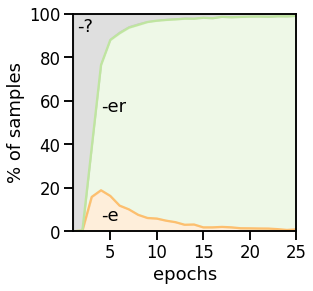

In [13]:
figure = plt.figure(figsize=(4, 4))
def sum_lists(lists):
    lists = np.matrix(lists).sum(axis=0).squeeze(0).tolist()
    return lists[0]

for i in [1, 3]:
    ax = sns.lineplot(x=epochs, y=sum_lists([accuracies[j] for j in range(i+1)]), color=colours[i])
    if i == 0:
        plt.fill_between(
            epochs, [0 for _ in epochs], accuracies[i], alpha=0.25, color=colours[i])
    elif i < 5:
        plt.fill_between(
            epochs, sum_lists([accuracies[j] for j in range(i)]),
            sum_lists([accuracies[j] for j in range(i+1)]), alpha=0.25, color=colours[i])

plt.fill_between(
    epochs, sum_lists([accuracies[j] for j in range(5)]),
    [1 for _ in epochs], alpha=0.25, color="grey")
        
colours = sns.color_palette("Spectral", 5)
plt.xlabel("epochs")
plt.ylabel("% of samples")
plt.ylim(0, 1)
plt.xlim(1, 25)
plt.text(1.48, 0.92, "-?")
plt.text(4, 0.55, "-er")
plt.text(4, 0.05, "-e")
ax.set_yticks([0, .20, .40, .60, .80, 1.00])
ax.set_yticklabels([0, 20, 40, 60, 80, 100])
ax.set_xticks([5, 10, 15, 20, 25])
plt.savefig("figures/overgeneralisation_wiktionary_er.pdf", bbox_inches="tight")